In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import joblib as joblib

In [14]:
data = pd.read_csv("stock_market_dataset.csv")

# Convert date and categorical data
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
le = LabelEncoder()
data['Company'] = le.fit_transform(data['Company'])

In [15]:
X = data[['Company', 'Open', 'Close', 'High', 'Low', 'Volume', 'Market_Cap', 'Day', 'Month', 'Year']].values
y = (data['Close'] > data['Open']).astype(int)

In [20]:
class RandomForestScratch:
    def __init__(self, n_trees=8, max_depth=None, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = int(self.sample_size * X.shape[0])
        indices = np.random.choice(X.shape[0], n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        
        # Save model weights
        joblib.dump(self.trees, "random_forest_weights.pkl")

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(tree_preds, axis=0))

In [21]:
# Train the Random Forest model
rf = RandomForestScratch(n_trees=5, max_depth=3)
rf.fit(X, y)
y_pred = rf.predict(X)

In [22]:
# Performance metrics
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.9415
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1010
           1       0.97      0.91      0.94       990

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



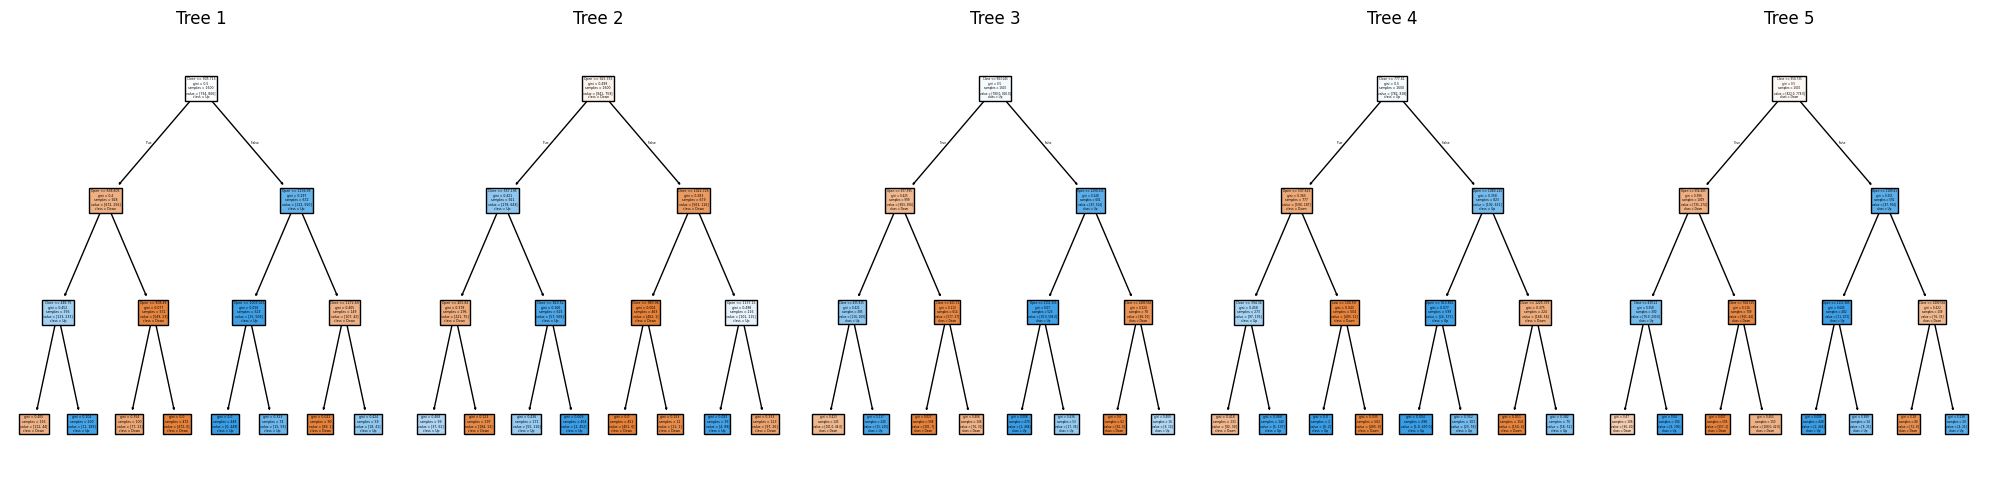

In [25]:
# Plot individual decision trees
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, tree in enumerate(rf.trees):
    plot_tree(tree, feature_names=['Company', 'Open', 'Close', 'High', 'Low', 'Volume', 'Market_Cap', 'Day', 'Month', 'Year'], class_names=['Down', 'Up'], filled=True, ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')
plt.tight_layout()
plt.show()